In [1]:
import obspy
from obspy import read, read_inventory
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_event_full_014(trace, start_time, end_time):
    # Create the figure and single subplot
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 7), constrained_layout=True)

    trace.normalize()

    times = np.linspace(0, 24, trace.stats.npts)  # Generate time axis in hours
    ax1.plot(times, trace.data, 'k-', linewidth=0.8, 
             label=f'{trace.stats.network}.{trace.stats.station}.{trace.stats.channel}')
    ax1.legend(fontsize=10)
    ax1.set_ylabel('Normalized amplitude', size=12)
    ax1.tick_params(axis='both', which='minor', labelsize=9)
    ax1.grid(color='gray', linestyle='-', linewidth=0.2)
    ax1.set_xlabel('Time [Hours]', size=12)
    ax1.set_xlim(start_time, end_time)
    ax1.set_ylim(-0.6, 0.6)  
    ax1.set_xticks(np.arange(0, 25, 1))
    
    # Adding annotations for significant events
    events = [
        {"time": 3.0, "label": "Intense seismic activity", "color": "red", "length": 0.2},
        {"time": 4.1, "label": "3.5ML quake", "color": "red", "length": 0.15},
        {"time": 7.95, "label": "Eruption begins", "color": "red", "length": 0.2},
        {"time": 12.17, "label": "New eruptive fissure", "color": "red", "length": 0.2}
    ]
    
    for event in events:
        ax1.annotate(
            event["label"],
            xy=(event["time"], max(trace.data) * 0.5),
            xytext=(event["time"], max(trace.data) * 0.5 + event["length"]),
            arrowprops=dict(facecolor=event["color"], shrink=0.05, width=1, headwidth=8, headlength=10),
            fontsize=10,
            color=event["color"],
            ha='center'
        )

    plt.show()
    save_name = 'day014_full' + '.png'
    fig.savefig("../figures/" + save_name)
        
# Read inventory
inv = read_inventory("../DATA/Stations_Reykjanes2021.xml", format='STATIONXML')

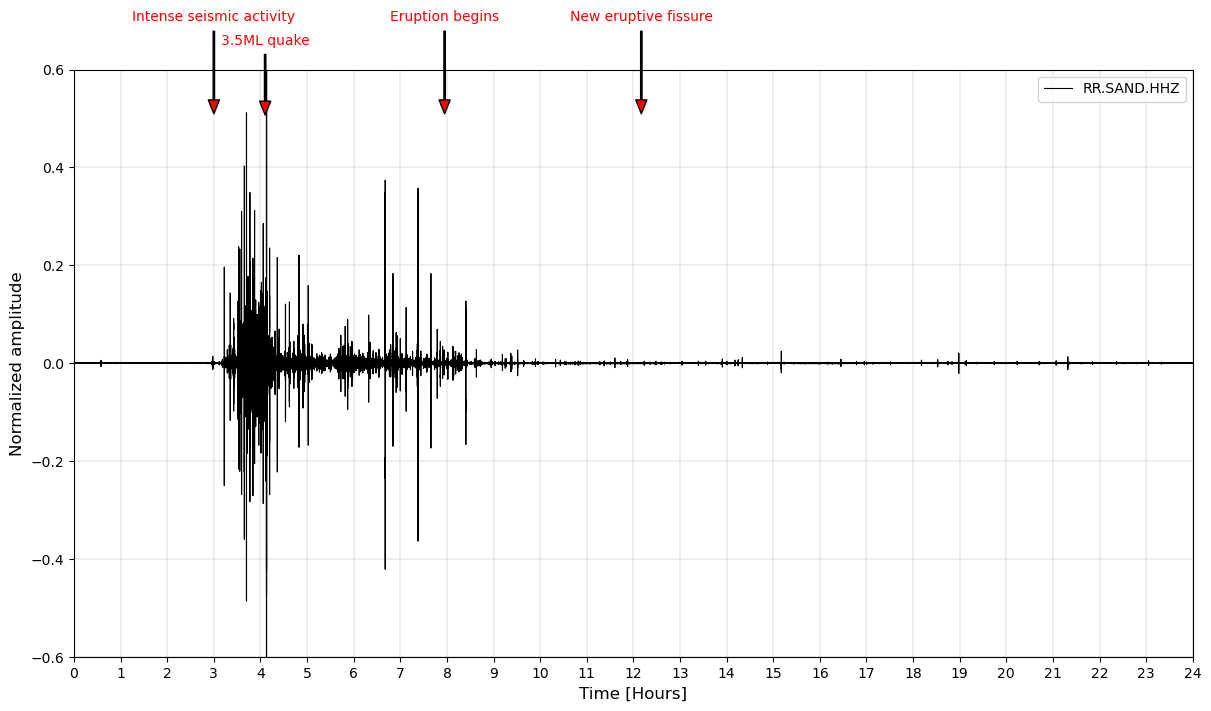

In [3]:
# Read the data for day 014
stZ = read("../DATA/HHZ.D/RR.SAND.00.HHZ.D.2024.014")

# Combine all Z traces into one continuous trace
st_Z = obspy.Stream()
st_Z += stZ

# Merge traces
st_Z.merge(method=1, fill_value='latest')

# Pre-process the data
stcopy_Z = st_Z.copy()
stcopy_Z.detrend('demean')
stcopy_Z.detrend('linear')
stcopy_Z.remove_response(inventory=inv, output="VEL")
stcopy_Z.filter("bandpass", freqmin=5.0, freqmax=15.0)

# Plot the data for the Z component
for trace in stcopy_Z:
    plot_event_full_014(trace, start_time=0, end_time=24)

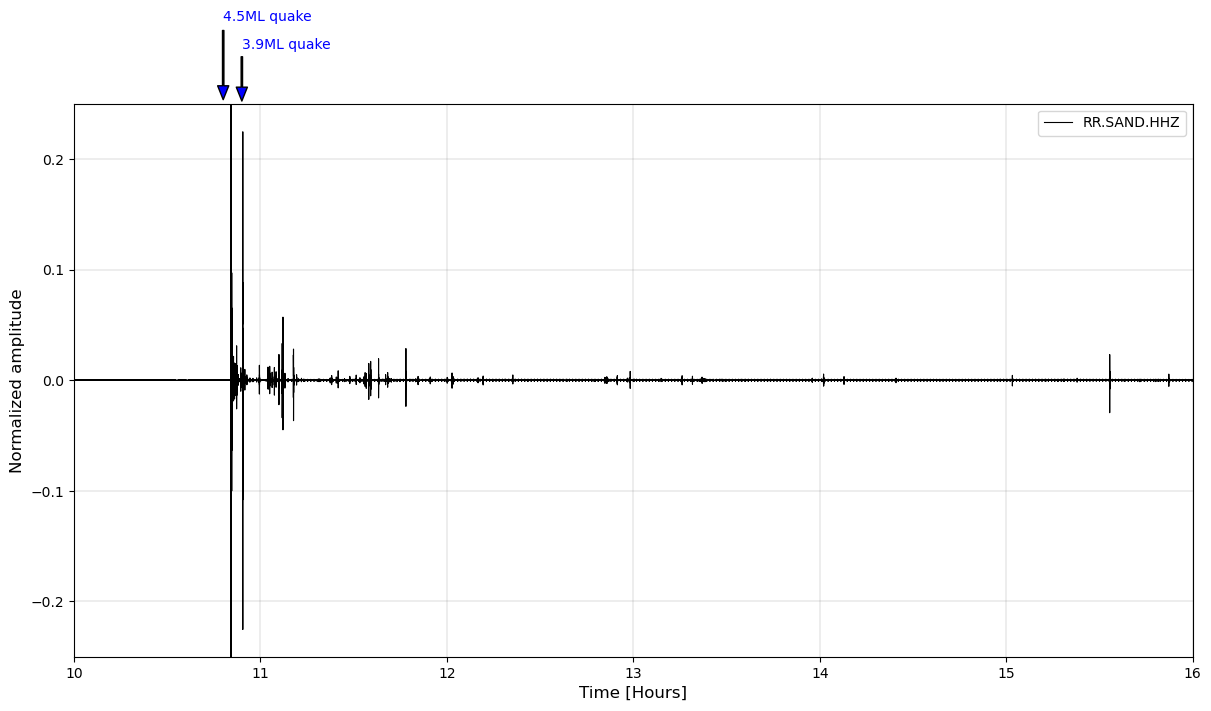

In [4]:
def plot_event_full_003(trace, start_time, end_time):
    # Create the figure and single subplot
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 7), constrained_layout=True)

    trace.normalize()
    
    times = np.linspace(0, 24, trace.stats.npts)  # Generate time axis in hours
    ax1.plot(times, trace.data, 'k-', linewidth=0.8, 
             label=f'{trace.stats.network}.{trace.stats.station}.{trace.stats.channel}')
    ax1.legend(fontsize=10)
    ax1.set_ylabel('Normalized amplitude', size=12)
    ax1.tick_params(axis='both', which='minor', labelsize=9)
    ax1.grid(color='gray', linestyle='-', linewidth=0.2)
    ax1.set_xlabel('Time [Hours]', size=12)
    ax1.set_xlim(start_time, end_time)
    ax1.set_ylim(-0.25, 0.25)  
    ax1.set_xticks(np.arange(10, 17, 1))
    
    # Adding annotations for significant events
    events = [
        {"time": 10.8, "label": "4.5ML quake", "color": "blue", "length": 0.075},  # 10:50 AM
        {"time": 10.9, "label": "3.9ML quake", "color": "blue", "length": 0.05},  # 10:54 AM
    ]
    
    max_value = max(abs(trace.data))
    
    for event in events:
        ax1.annotate(
            event["label"],
            xy=(event["time"], max_value * 0.25),
            xytext=(event["time"], max_value * 0.25 + event["length"]),
            arrowprops=dict(facecolor=event["color"], shrink=0.05, width=1, headwidth=8, headlength=10),
            fontsize=10,
            color=event["color"],
            ha='left'
        )

    plt.show()
    save_name = 'day003_full' + '.png'
    fig.savefig("../figures/" + save_name)

# Read the data for day 014
stZ = read("../DATA/HHZ.D/RR.SAND.00.HHZ.D.2024.003")

# Combine all Z traces into one continuous trace
st_Z = obspy.Stream()
st_Z += stZ

# Merge traces
st_Z.merge(method=1, fill_value='latest')

# Pre-process the data
stcopy_Z = st_Z.copy()
stcopy_Z.detrend('demean')
stcopy_Z.detrend('linear')
stcopy_Z.remove_response(inventory=inv, output="VEL")
stcopy_Z.filter("bandpass", freqmin=5.0, freqmax=15.0)

# Plot the data for the Z component
for trace in stcopy_Z:
    plot_event_full_003(trace, start_time=10, end_time=16)